In [58]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

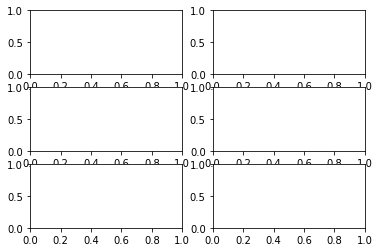

In [15]:
ax=plt.subplots(3,2)

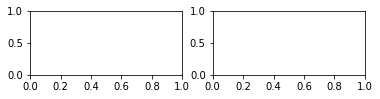

In [16]:
ax1=plt.subplot(3,2,1)
ax2=plt.subplot(3,2,2)

In [21]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

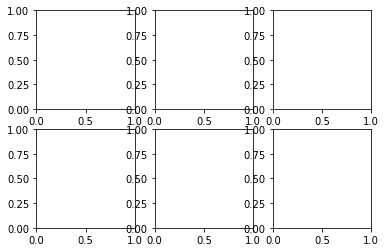

In [22]:
fig, ax = plt.subplots(2, 3)

In [26]:
ax11,ax12,ax13,ax21,ax22,ax23=ax.ravel()

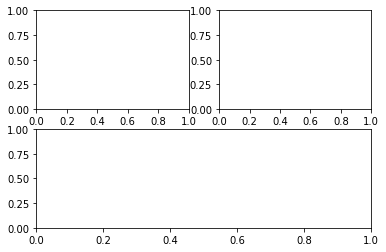

In [27]:
ax11 = plt.subplot(2, 2, 1)
ax21 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

In [28]:
import numpy as np

In [29]:
sin=np.sin(np.linspace(-4,4,100))

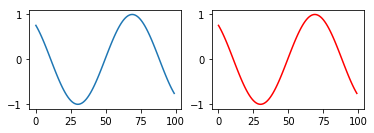

In [30]:
plt.subplot(2, 2, 1)
plt.plot(sin)
plt.subplot(2, 2, 2)
plt.plot(sin, c='r')

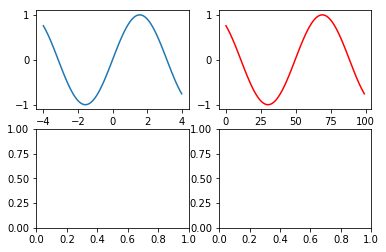

In [36]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(np.linspace(-4,4,100),sin)
axes[0, 1].plot(sin, c='r')

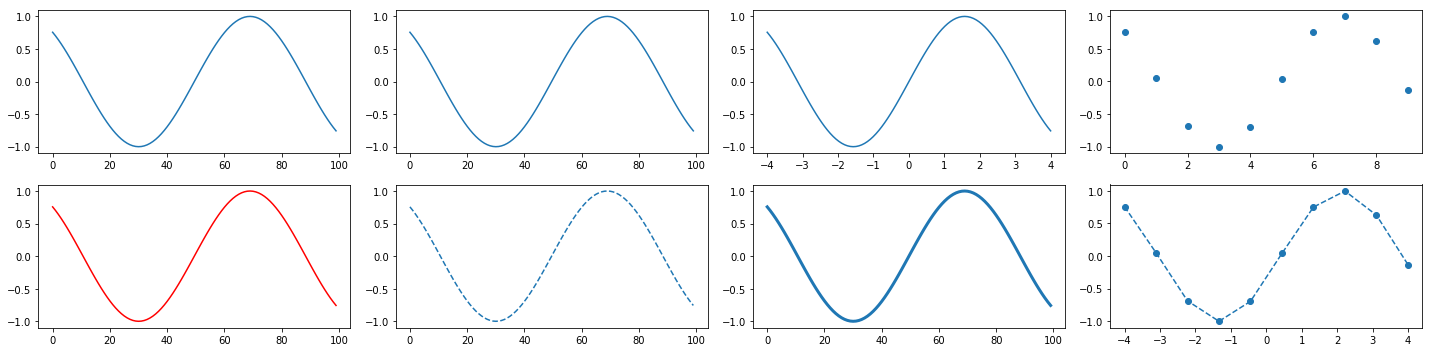

In [59]:
fig, ax = plt.subplots(2, 4, figsize=(20, 5))
ax[0, 0].plot(sin)
ax[0, 1].plot(range(100), sin)  # same as above
ax[0, 2].plot(np.linspace(-4, 4, 100), sin)
ax[0, 3].plot(sin[::10], 'o')
ax[1, 0].plot(sin, c='r')
ax[1, 1].plot(sin, '--')
ax[1, 2].plot(sin, lw=3)
ax[1, 3].plot(np.linspace(-4, 4, 10),sin[::10], '--o')
plt.tight_layout() # makes stuff fit - usually works

(array([  2.,   0.,   4.,   5.,  14.,  21.,  39.,  43.,  76.,  72., 100.,
        115., 114.,  89.,  83.,  68.,  57.,  43.,  21.,   7.,  10.,  10.,
          4.,   2.,   1.]),
 array([-3.33302591, -3.06280598, -2.79258604, -2.52236611, -2.25214618,
        -1.98192625, -1.71170631, -1.44148638, -1.17126645, -0.90104652,
        -0.63082658, -0.36060665, -0.09038672,  0.17983321,  0.45005315,
         0.72027308,  0.99049301,  1.26071294,  1.53093288,  1.80115281,
         2.07137274,  2.34159267,  2.61181261,  2.88203254,  3.15225247,
         3.4224724 ]),
 <a list of 25 Patch objects>)

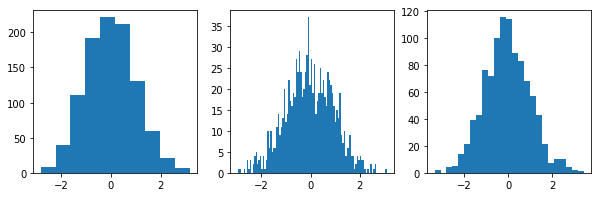

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].hist(np.random.normal(size=1000))
ax[1].hist(np.random.normal(size=1000), bins=100)
ax[2].hist(np.random.normal(size=1000), bins="auto")

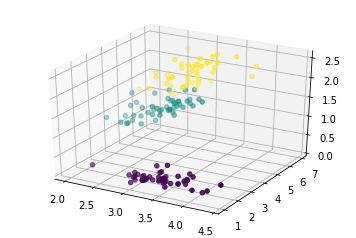

In [61]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
fig = plt.figure()
ax = fig.add_subplot(
    111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 3],
           c=y)

In [62]:
X=np.array([[1.1,2.2],[6.7,0.5],[2.4,9.3],[1.5,0.0],[0.5,3.5],[5.1,9.7],[3.7,7.8]])

In [63]:
X

array([[1.1, 2.2],
       [6.7, 0.5],
       [2.4, 9.3],
       [1.5, 0. ],
       [0.5, 3.5],
       [5.1, 9.7],
       [3.7, 7.8]])

In [66]:
y=np.array([[0],[1],[1],[0],[1],[0],[0]])

In [67]:
y

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [112]:
X_train

array([[5.1, 9.7],
       [1.1, 2.2],
       [6.7, 0.5],
       [3.7, 7.8],
       [2.4, 9.3]])

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [114]:
knn.fit(X_train,y_train)

/Users/yang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [115]:
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.50


In [116]:
y_pred = knn.predict(X_test)

In [117]:
y_pred,y_test

(array([0, 0]), array([[0],
        [1]]))

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale

In [119]:
data=load_breast_cancer()

In [121]:
X,y=data.data,data.target

In [124]:
X=scale(X)

In [125]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval)

In [126]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [127]:
print("Validation: {:.3f}".format(knn.score(X_val, y_val)))

Validation: 0.953


In [128]:
print("Test:{:.3f}".format(knn.score(X_test,y_test)))

Test:0.951


In [135]:
np.random.RandomState(0)

In [136]:
val=[]
test=[]
for i in range(1000):
    rng=np.random.RandomState(i)
    noise=rng.normal(scale=.1,size=X_train.shape)
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train+noise,y_train)
    val.append(knn.score(X_val,y_val))
    test.append(knn.score(X_test,y_test))
    
print("validation:{:.3f}".format(np.max(val)))
print("Test: {:.3f}".format(test[np.argmax(val)]))

validation:0.972
Test: 0.944


In [137]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)
val_scores = []
neighbors = np.arange(1, 15, 2)

In [139]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val_scores.append(knn.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.972
best n_neighbors: 9
test-set score: 0.972


In [140]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y)
cross_val_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors: {}".format(best_n_neighbors))
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.967
best n_neighbors: 5
test-set score: 0.965


In [141]:
scores = cross_val_score(knn, X_train, y_train, cv=10)

In [150]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10)

In [151]:
scores

array([1.        , 0.95348837, 0.93023256, 0.95348837, 0.93023256,
       0.97674419, 1.        , 0.97619048, 0.97619048, 0.97619048])

In [152]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
param_grid = {'n_neighbors':  np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,
                    cv=10, return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.969
best parameters: {'n_neighbors': 5}
test-set score: 0.951


In [153]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.columns

/Users/yang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [155]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000868,0.000586,0.001871,0.000689,1,{'n_neighbors': 1},0.953488,0.976744,0.976744,0.976744,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000414,0.000036,0.001084,0.000114,3,{'n_neighbors': 3},0.953488,0.976744,0.976744,1.000000,...,0.973890,0.976501,0.976501,0.971279,0.976501,0.981771,0.984375,0.979221,0.978349,0.003894
2,0.000444,0.000117,0.001086,0.000191,5,{'n_neighbors': 5},0.976744,0.976744,0.976744,0.976744,...,0.971279,0.973890,0.976501,0.973890,0.976501,0.981771,0.976562,0.974026,0.976004,0.002813
3,0.000442,0.000041,0.001172,0.000141,7,{'n_neighbors': 7},0.976744,0.976744,0.976744,1.000000,...,0.971279,0.971279,0.973890,0.971279,0.971279,0.981771,0.979167,0.971429,0.974699,0.003884
4,0.000445,0.000107,0.001660,0.001014,9,{'n_neighbors': 9},0.976744,0.976744,0.953488,1.000000,...,0.971279,0.966057,0.971279,0.966057,0.966057,0.976562,0.966146,0.974026,0.970002,0.004264
5,0.000448,0.000081,0.001355,0.000393,11,{'n_neighbors': 11},0.953488,0.976744,0.953488,1.000000,...,0.968668,0.963446,0.971279,0.963446,0.963446,0.973958,0.966146,0.968831,0.967395,0.003370
6,0.000444,0.000080,0.001227,0.000174,13,{'n_neighbors': 13},0.953488,0.976744,0.953488,1.000000,...,0.960836,0.958225,0.963446,0.960836,0.963446,0.968750,0.960938,0.966234,0.963221,0.003416


In [161]:
results.params[0]['n_neighbors']

1

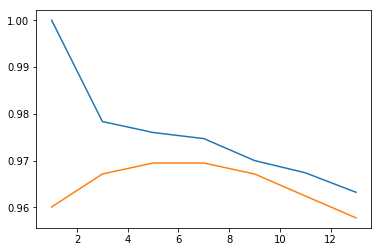

In [172]:
plt.plot(np.arange(1,15,2),results.mean_train_score)
plt.plot(np.arange(1,15,2),results.mean_test_score)

In [173]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(n_splits=20, train_size=.4, test_size=.3)
rs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
print("KFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))
print("StratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=skfold)))
print("ShuffleSplit:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=ss)))
print("RepeatedStratifiedKFold:\n{}".format(
      cross_val_score(KNeighborsClassifier(), X, y, cv=rs)))

KFold:
[0.92982456 0.95614035 0.96491228 0.98245614 0.96460177]
StratifiedKFold:
[0.9826087  0.96521739 0.97345133 0.95575221 0.96460177]
ShuffleSplit:
[0.95906433 0.95906433 0.94736842 0.95906433 0.97660819 0.96491228
 0.95906433 0.97076023 0.95906433 0.98830409 0.95906433 0.95321637
 0.95906433 0.95321637 0.94736842 0.95321637 0.93567251 0.95906433
 0.97076023 0.97076023]
RepeatedStratifiedKFold:
[0.95652174 0.97391304 0.98230088 0.98230088 0.95575221 0.9826087
 0.99130435 0.92920354 0.95575221 0.98230088 0.93043478 0.95652174
 0.95575221 0.99115044 0.97345133 0.93913043 0.95652174 1.
 0.98230088 0.95575221 1.         0.97391304 0.92035398 0.97345133
 0.99115044 0.96521739 0.95652174 0.98230088 0.97345133 0.97345133
 0.97391304 0.9826087  0.96460177 0.96460177 0.95575221 0.94782609
 0.99130435 0.97345133 0.95575221 0.95575221 0.9826087  0.93043478
 0.98230088 0.96460177 0.95575221 0.93913043 0.99130435 0.96460177
 0.97345133 0.96460177]
